# Introduction:
For our final project we looked through different datasets that lead us to finding Squirrel Hill South as the best neighborhood in Pittsburgh. We did this through analyzing data from three different datasets and then combining this data to fit our metric. In order to come up with our metric, each member of our group found a dataset that interested them, and from these datasets we came up with a metric that fit all three. From each dataset, we created rating for each neighborhood. After that, we combined the ratings and found the average rating for each neighborhood. The neighborhood with the highest average rating was our best neighborhood.
As an alternative, we could have came up with our metric and then explored datasets that fit this metric. Also, we have could have looked into some of the other data that our datasets provided rather than focusing on which neighborhoods had the most or highest of a certain data. Finally, we could have merged all of our datasets and determined the best neighborhood that way. 


# The Metric:
Our metric explores which neighborhood has is the best in terms of a well-rounded life. To determine this, we use datasets that show the number of traffic signs, information on playgrounds, and data on street art in each neighborhood. For the playground data set, we took into account the number of playgrounds. Another dataset was used to show the number of traffic signs per neighborhood, and our final data set showed how much art was in a given neighborhood. From there, we gave each neighborhood a ranking out of ten which we found from dividing the total art, playgrounds, and the number of traffic signs by the greatest number in the dataset and multiplied that by ten. We then combined the ratings and found the average rating for each neighborhood which is how we measured our metric.


# The Best Neighborhood:
## Squirrel Hill South

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as geo
hood=geo.read_file("Neighborhoods/Neighborhoods_.shp")

play = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
public_art_data = pd.read_csv("public-art.csv", index_col="id")
signs=pd.read_csv("https://data.wprdc.org/datastore/dump/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c")

## Traffic Signs Visualization

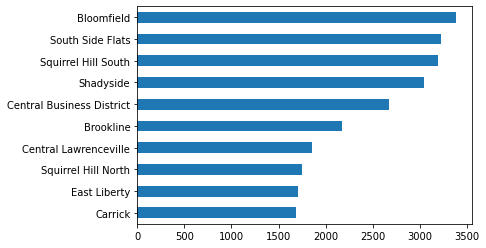

In [84]:
signs1 = signs['neighborhood'].value_counts().sort_values(ascending=True).tail(10)
signs1.plot.barh(x="neighborhood",y="mounting_fixtures")

## Art Visualization

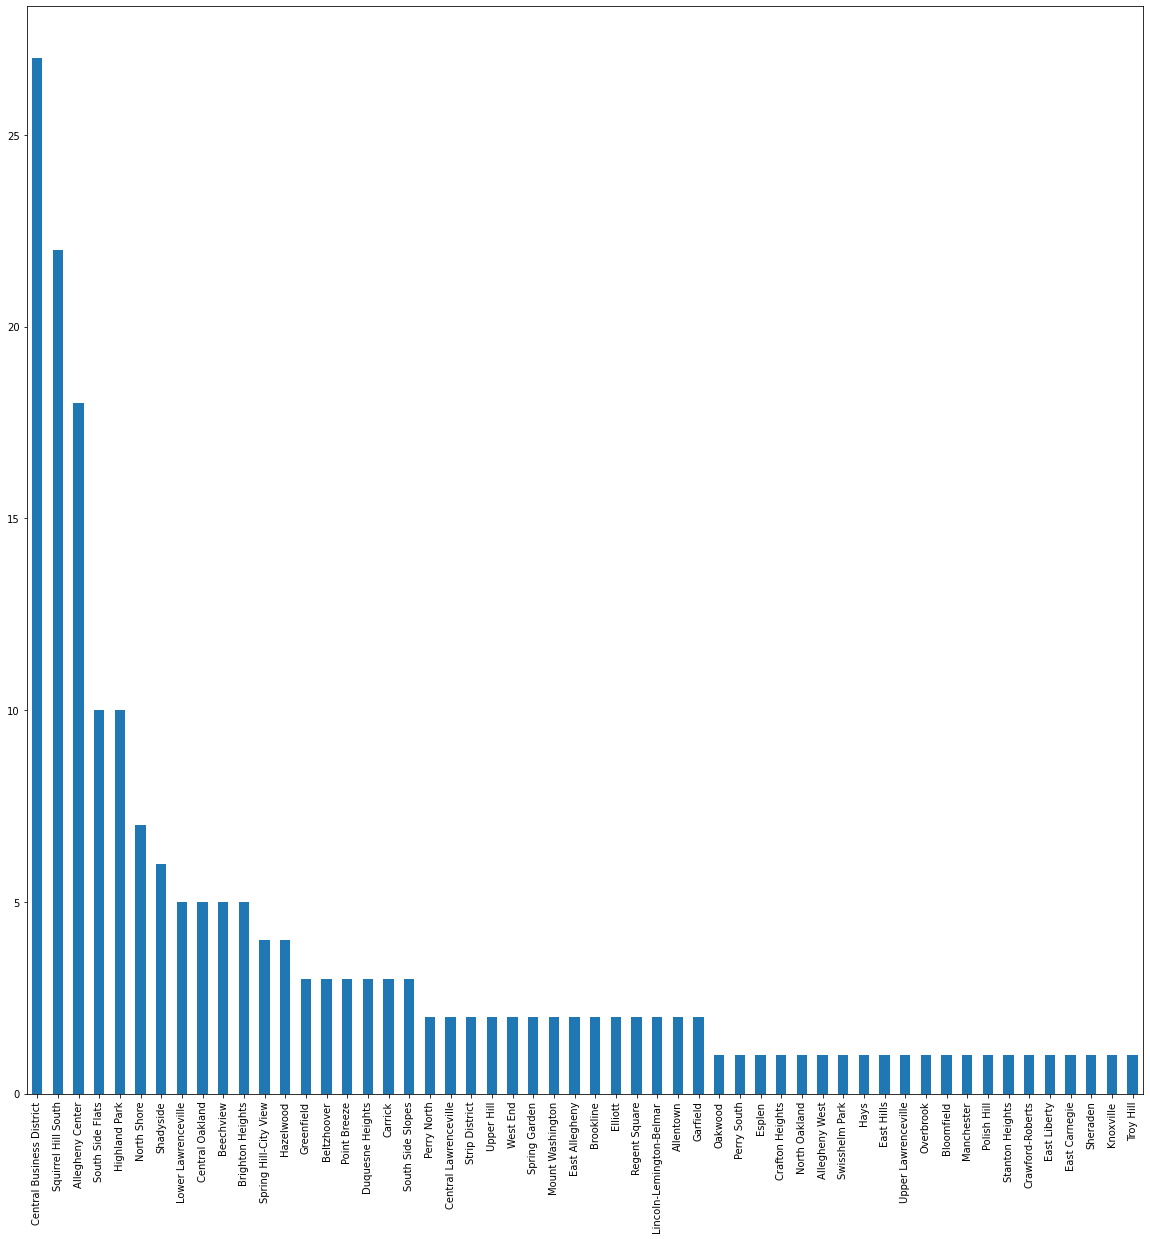

In [60]:
neighborhoods = public_art_data['neighborhood'].value_counts()
neighborhoods.plot.bar(figsize=(20, 20))

## Playground Visualization

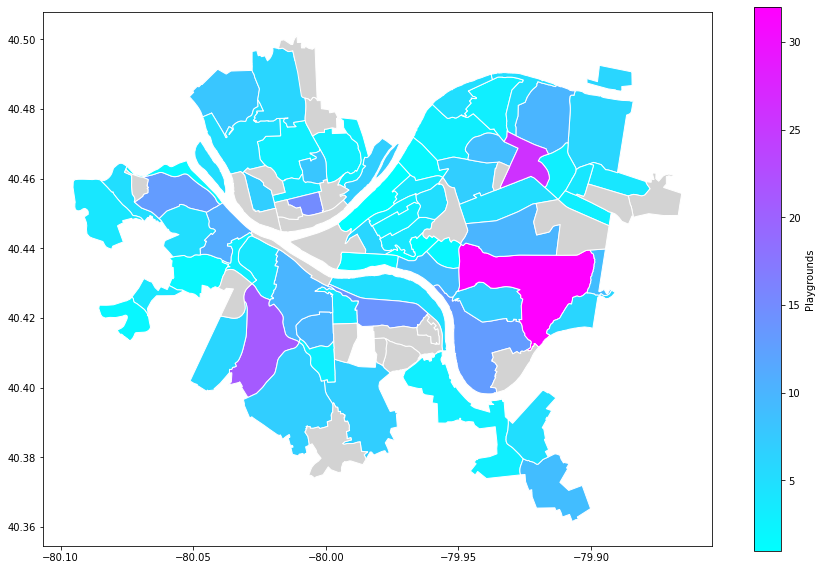

In [61]:
neighbor=play.groupby('neighborhood').count()
play_map = hood.merge(neighbor, how='left', left_on='hood', right_on='neighborhood')
play_map.plot(column='ada_accessible',
             cmap='cool',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             )

In [85]:
neighborhood1 = play['neighborhood'].value_counts().sort_values(ascending=False).reset_index()

neighborhood2 = public_art_data['neighborhood'].value_counts().sort_values(ascending=False).reset_index()

neighborhood3 = signs['neighborhood'].value_counts().sort_values(ascending=False).reset_index()

#reset=neighborhood.reset_index()

In [86]:
play_rate=pd.DataFrame(neighborhood1)
play_rate["Rating"]=((play_rate['neighborhood']/32)*10)

art_rate=pd.DataFrame(neighborhood2)
art_rate["Rating"]=((art_rate['neighborhood']/27)*10)
art_rate.head()

signs_rate=pd.DataFrame(neighborhood3)
signs_rate["Rating"]=((signs_rate['neighborhood']/3387)*10) 
signs_rate.head()

,index,neighborhood,Rating
0,Bloomfield,3387,10.000000
1,South Side Flats,3230,9.536463
2,Squirrel Hill South,3191,9.421317
3,Shadyside,3046,8.993209
4,Central Business District,2669,7.880130


In [87]:
#metric=play_rate.merge(art_rate, how='left', on='index')
#final_metric=metric.merge(signs_rate, how='left', left_on='index', right_on='neighborhood')

metric=play_rate.merge(art_rate, how='left', on='index')
final_metric=metric.merge(signs_rate, how='left', on='index')

final_metric.head()

,index,neighborhood_x,Rating_x,neighborhood_y,Rating_y,neighborhood,Rating
0,Squirrel Hill South,32,10.0000,22.0,8.148148,3191,9.421317
1,East Liberty,26,8.1250,1.0,0.370370,1712,5.054621
2,Beechview,21,6.5625,5.0,1.851852,1328,3.920874
3,Allegheny Center,15,4.6875,18.0,6.666667,580,1.712430
4,South Side Slopes,14,4.3750,3.0,1.111111,938,2.769412


# Conclusions:
## Hannah: 
Honestly, I do not have any experience with Pittsburgh neighborhoods. I've been living on campus, so I only know a very small amount of information about Oakland. I hadn't even heard of most of the neighborhoods I was gathering data on, but I have been through Squirrel Hill South on a bus before. It looks nice enough, and as far as our data shows, it proves to be the best neighborhoods in Pittsburgh. 

## Jennifer: 
  
I was surprised by how many public art pieces there were in Pittsburgh. I also do not know much about Pittsburgh's neighborhoods, so it was interesting to discover what kinds of art are there and which neighborhoods had the most, one of them being Squirrel Hill South.

## Jessica:
After finding and looking over the data, I realized that our perfect neighborhood is very different than my personal favorite neighborhood. These specific characteristics of our perfect neighborhood Squirrel Hill South, aren't things I really noticed in my favorite neighborhood, but they are both good neighborhoods with differing qualities.

In [38]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as geo
hood=geo.read_file("Neighborhoods/Neighborhoods_.shp")

signs=pd.read_csv("https://data.wprdc.org/datastore/dump/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c")
play = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
public_art_data = pd.read_csv("public-art.csv", index_col="id")

In [50]:
neighborhood=play['neighborhood'].value_counts().sort_values(ascending=False).reset_index()


neighbor=signs['neighborhood'].value_counts().sort_values(ascending=False).reset_index()

#death10=death.sort_values(by=["TOTAL MD AGE AT DEATH"], ascending=False)
#dropped=death10.drop(columns=['BLACKdeaths','Black MD AGE AT DEATH', 'WHITEdeaths','White MD AGE AT DEATH','TOTALdeaths*']).reset_index()


neighborhoods = public_art_data['neighborhood'].value_counts().sort_values(ascending=False).reset_index()
neighbor

In [36]:

play_rate=pd.DataFrame(neighborhood)

play_rate["Playground Rating"]=((play_rate['neighborhood']/32)*10)

sign_rate=pd.DataFrame(neighbor)
sign_rate["Traffic Sign Rating"]=((sign_rate['neighborhood']/3387)*10)


dropped['NEIGHBORHOOD']=dropped['NEIGHBORHOOD'].str.lower()
death_rate=pd.DataFrame(dropped)

death_rate["Rating"]=((death_rate['TOTAL MD AGE AT DEATH']/85.9)*10)


art_rate=pd.DataFrame(neighborhoods)

art_rate["Public Art Rating"]=((art_rate['neighborhood']/27)*10)

sign_rate

KeyError: 'neighborhood'

In [35]:
metric=play_rate.merge(art_rate, on='index')
final_metric=metric.merge(sign_rate, on='index')

final_metric


NameError: name 'sign_rate' is not defined

In [34]:
drop=final_metric.drop(columns=['neighborhood_x','neighborhood_y','neighborhood'])
av_rate=0
averages=pd.DataFrame(drop)
averages['Average Rating']=""
row=0
for i in drop['index']:
    av_rate=(drop.loc[row,'Playground Rating']+drop.loc[row,'Traffic Sign Rating']+drop.loc[row,'Public Art Rating'])/3
    averages.at[row,'Average Rating']=av_rate
    av_rate=0
    row=row+1
drop

NameError: name 'final_metric' is not defined

In [33]:
averages['Average Rating'].sort_values(ascending=False)
averages.set_index('index')

NameError: name 'averages' is not defined

In [32]:
play_map = hood.merge(averages, how='left', left_on='hood', right_on='index')
play_map.plot(column='Average Rating',
            cmap='cool',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=False,              # show the legend
               legend_kwds={'label': "index"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             )

NameError: name 'averages' is not defined